# Smart Home's Temperature - Time Series Forecasting


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import gc

# Loading Data

In [2]:
train=pd.read_csv('../input/smart-homes-temperature-time-series-forecasting/train.csv')
test=pd.read_csv('../input/smart-homes-temperature-time-series-forecasting/test.csv')

train.shape, test.shape

((2764, 19), (1373, 18))

# Understanding Data 

In [3]:
train.head()

,Id,Date,Time,CO2_(dinning-room),CO2_room,Relative_humidity_(dinning-room),Relative_humidity_room,Lighting_(dinning-room),Lighting_room,Meteo_Rain,Meteo_Sun_dusk,Meteo_Wind,Meteo_Sun_light_in_west_facade,Meteo_Sun_light_in_east_facade,Meteo_Sun_light_in_south_facade,Meteo_Sun_irradiance,Outdoor_relative_humidity_Sensor,Day_of_the_week,Indoor_temperature_room
0,0,13/03/2012,11:45,216.560,221.920,39.9125,42.4150,81.6650,113.520,0.0,623.360,1.42625,9690.24,12604.20,95436.8,758.880,48.3750,2.0,17.8275
1,1,13/03/2012,12:00,219.947,220.363,39.9267,42.2453,81.7413,113.605,0.0,623.211,1.59200,11022.00,10787.20,95436.8,762.069,47.8080,2.0,18.1207
2,2,13/03/2012,12:15,219.403,218.933,39.7720,42.2267,81.4240,113.600,0.0,622.656,1.89133,13960.50,9669.63,95398.6,766.251,47.4320,2.0,18.4367
3,3,13/03/2012,12:30,218.613,217.045,39.7760,42.0987,81.5013,113.344,0.0,622.571,1.82800,18511.20,9648.13,95360.3,766.037,47.0240,2.0,18.7513
4,4,13/03/2012,12:45,217.714,216.080,39.7757,42.0686,81.4657,113.034,0.0,622.400,2.36071,26349.00,9208.32,95354.9,762.743,45.4743,2.0,19.0414


In [4]:
test.head()

,Id,Date,Time,CO2_(dinning-room),CO2_room,Relative_humidity_(dinning-room),Relative_humidity_room,Lighting_(dinning-room),Lighting_room,Meteo_Rain,Meteo_Sun_dusk,Meteo_Wind,Meteo_Sun_light_in_west_facade,Meteo_Sun_light_in_east_facade,Meteo_Sun_light_in_south_facade,Meteo_Sun_irradiance,Outdoor_relative_humidity_Sensor,Day_of_the_week
0,2764,18/04/2012,00:00,207.840,206.560,31.5800,30.1600,11.7200,14.1600,0.0,0.65,0.000000,0.0,0.0,0.0,-3.12000,39.0800,3.0
1,2765,18/04/2012,00:15,207.499,206.101,31.6240,30.0613,11.5240,14.7600,0.0,0.65,0.000000,0.0,0.0,0.0,-2.80800,38.9680,3.0
2,2766,18/04/2012,00:30,207.360,206.805,31.6507,30.1773,11.6220,14.9547,0.0,0.65,0.088000,0.0,0.0,0.0,-2.96400,38.9467,3.0
3,2767,18/04/2012,00:45,207.445,206.325,31.6987,30.2560,11.7847,15.0520,0.0,0.65,0.127333,0.0,0.0,0.0,-3.02933,39.0760,3.0
4,2768,18/04/2012,01:00,207.840,205.952,31.7707,30.3840,11.5887,15.2147,0.0,0.65,0.000000,0.0,0.0,0.0,-2.88600,40.0413,3.0


### Checking missing values

In [5]:
train.isna().sum().any(), test.isna().sum().any()

(False, False)

### Checking columns dtypes and data memories size

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2764 entries, 0 to 2763
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Id                                2764 non-null   int64  
 1   Date                              2764 non-null   object 
 2   Time                              2764 non-null   object 
 3   CO2_(dinning-room)                2764 non-null   float64
 4   CO2_room                          2764 non-null   float64
 5   Relative_humidity_(dinning-room)  2764 non-null   float64
 6   Relative_humidity_room            2764 non-null   float64
 7   Lighting_(dinning-room)           2764 non-null   float64
 8   Lighting_room                     2764 non-null   float64
 9   Meteo_Rain                        2764 non-null   float64
 10  Meteo_Sun_dusk                    2764 non-null   float64
 11  Meteo_Wind                        2764 non-null   float64
 12  Meteo_

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1373 entries, 0 to 1372
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Id                                1373 non-null   int64  
 1   Date                              1373 non-null   object 
 2   Time                              1373 non-null   object 
 3   CO2_(dinning-room)                1373 non-null   float64
 4   CO2_room                          1373 non-null   float64
 5   Relative_humidity_(dinning-room)  1373 non-null   float64
 6   Relative_humidity_room            1373 non-null   float64
 7   Lighting_(dinning-room)           1373 non-null   float64
 8   Lighting_room                     1373 non-null   float64
 9   Meteo_Rain                        1373 non-null   float64
 10  Meteo_Sun_dusk                    1373 non-null   float64
 11  Meteo_Wind                        1373 non-null   float64
 12  Meteo_

### Dropping duplicates instances

In [8]:
print(train.shape)
train = train.drop_duplicates()
print(train.shape)

(2764, 19)
(2764, 19)


### Describe data

In [9]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2764.0,1381.500000,798.042397,0.000000,690.750000,1381.50000,2072.250000,2763.00000
CO2_(dinning-room),2764.0,208.479123,27.032686,187.339000,200.893250,207.04550,211.245500,594.38900
CO2_room,2764.0,211.065844,28.469144,188.907000,202.682750,209.40800,213.218750,609.23700
Relative_humidity_(dinning-room),2764.0,44.878420,6.587440,27.084000,40.351975,45.43465,49.352675,60.95730
Relative_humidity_room,2764.0,47.321220,7.557795,29.594700,42.531325,47.53470,52.685975,62.59470
Lighting_(dinning-room),2764.0,26.745381,23.298441,10.740000,11.588700,11.80130,31.224000,110.69300
Lighting_room,2764.0,40.732571,42.326087,11.328000,13.265300,17.69000,52.057350,162.96500
Meteo_Rain,2764.0,0.047033,0.206705,0.000000,0.000000,0.00000,0.000000,1.00000
Meteo_Sun_dusk,2764.0,325.369289,305.062614,0.606667,0.650000,611.79700,619.210750,624.96000
Meteo_Wind,2764.0,1.108531,1.161283,0.000000,0.094833,0.65900,1.971497,6.32133


In [10]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1373.0,3450.000000,396.495271,2764.000000,3107.000000,3450.00000,3793.0000,4136.0000
CO2_(dinning-room),1373.0,202.816621,8.303086,189.195000,197.867000,203.11500,206.2190,278.6450
CO2_room,1373.0,206.684117,10.862867,192.107000,199.541000,207.92500,210.7310,313.2160
Relative_humidity_(dinning-room),1373.0,37.380174,5.653677,26.173300,32.484000,35.84130,42.9253,52.5893
Relative_humidity_room,1373.0,38.959385,6.765015,27.256000,32.569300,38.81200,44.7013,52.6240
Lighting_(dinning-room),1373.0,33.449148,29.418966,10.838000,11.540700,20.82330,51.5733,111.7970
Lighting_room,1373.0,45.562360,42.988297,13.509300,14.906700,24.41600,67.5200,157.1570
Meteo_Rain,1373.0,0.022093,0.138203,0.000000,0.000000,0.00000,0.0000,1.0000
Meteo_Sun_dusk,1373.0,354.671855,302.567396,0.606667,0.650000,615.36000,620.4370,625.0030
Meteo_Wind,1373.0,1.699378,1.251345,0.000000,0.614667,1.57267,2.7160,5.3540


# Data Preprocessing

- Converting `Date` and `Time` columns to DateTime

In [11]:
train["DateTime"] = pd.to_datetime(train["Date"] + ' ' + train["Time"])

train["DateTime"].head()

0   2012-03-13 11:45:00
1   2012-03-13 12:00:00
2   2012-03-13 12:15:00
3   2012-03-13 12:30:00
4   2012-03-13 12:45:00
Name: DateTime, dtype: datetime64[ns]

In [12]:
test["DateTime"] = pd.to_datetime(test["Date"] + ' ' + test["Time"])

test["DateTime"].head()

0   2012-04-18 00:00:00
1   2012-04-18 00:15:00
2   2012-04-18 00:30:00
3   2012-04-18 00:45:00
4   2012-04-18 01:00:00
Name: DateTime, dtype: datetime64[ns]

- Removing `Date` and `Time` columns 

In [13]:
remove_col = ['Id','Date','Time']

print("Before :", train.shape, test.shape)

train = train.drop(remove_col,axis=1)
test = test.drop(remove_col,axis=1)

print("After :", train.shape, test.shape)

# Free memories
gc.collect()

Before : (2764, 20) (1373, 19)
After : (2764, 17) (1373, 16)


126

# Features Engineering

- Features Extraction

In [14]:
# Thanks : https://www.kaggle.com/code/iamleonie/intro-to-time-series-forecasting/notebook

def extrac_features(df=pd.DataFrame(), col='DateTime', prefix='DateTime'):
    
    #df[f'{prefix}_year']         = pd.DatetimeIndex(df[col]).year
    df[f'{prefix}_month']        = pd.DatetimeIndex(df[col]).month
    df[f'{prefix}_day']          = pd.DatetimeIndex(df[col]).day
    df[f'{prefix}_day_of_year']  = pd.DatetimeIndex(df[col]).dayofyear
    df[f'{prefix}_day_of_week']  = pd.DatetimeIndex(df[col]).dayofweek
    df[f'{prefix}_week_of_year'] = pd.DatetimeIndex(df[col]).weekofyear
    df[f'{prefix}_quarter']      = pd.DatetimeIndex(df[col]).quarter
    
    #df[f'{prefix}_is_month_start']  = pd.DatetimeIndex(df[col]).is_month_start
    df[f'{prefix}_is_month_end']    = pd.DatetimeIndex(df[col]).is_month_end
    
    df[f'{prefix}_hour']         = pd.DatetimeIndex(df[col]).hour
    df[f'{prefix}_minute']       = pd.DatetimeIndex(df[col]).minute
    
    df[f'{prefix}_season']       = df[f'{prefix}_month']%12 // 3 + 1
    
    return df

In [15]:
train_fe = extrac_features(train.copy(), 'DateTime')
test_fe = extrac_features(test.copy(), 'DateTime')

print("New data dimensions :", train_fe.shape, test_fe.shape, '\n')
train_fe.head(3)

New data dimensions : (2764, 27) (1373, 26) 



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  # Remove the CWD from sys.path while we load stuff.


,CO2_(dinning-room),CO2_room,Relative_humidity_(dinning-room),Relative_humidity_room,Lighting_(dinning-room),Lighting_room,Meteo_Rain,Meteo_Sun_dusk,Meteo_Wind,Meteo_Sun_light_in_west_facade,...,DateTime_month,DateTime_day,DateTime_day_of_year,DateTime_day_of_week,DateTime_week_of_year,DateTime_quarter,DateTime_is_month_end,DateTime_hour,DateTime_minute,DateTime_season
0,216.560,221.920,39.9125,42.4150,81.6650,113.520,0.0,623.360,1.42625,9690.24,...,3,13,73,1,11,1,False,11,45,2
1,219.947,220.363,39.9267,42.2453,81.7413,113.605,0.0,623.211,1.59200,11022.00,...,3,13,73,1,11,1,False,12,0,2
2,219.403,218.933,39.7720,42.2267,81.4240,113.600,0.0,622.656,1.89133,13960.50,...,3,13,73,1,11,1,False,12,15,2


- Checking Correlation matrix

In [16]:
corr = train_fe.corr()
corr.style.background_gradient(cmap='coolwarm')

,CO2_(dinning-room),CO2_room,Relative_humidity_(dinning-room),Relative_humidity_room,Lighting_(dinning-room),Lighting_room,Meteo_Rain,Meteo_Sun_dusk,Meteo_Wind,Meteo_Sun_light_in_west_facade,Meteo_Sun_light_in_east_facade,Meteo_Sun_light_in_south_facade,Meteo_Sun_irradiance,Outdoor_relative_humidity_Sensor,Day_of_the_week,Indoor_temperature_room,DateTime_month,DateTime_day,DateTime_day_of_year,DateTime_day_of_week,DateTime_week_of_year,DateTime_quarter,DateTime_is_month_end,DateTime_hour,DateTime_minute,DateTime_season
CO2_(dinning-room),1.000000,0.925522,-0.004698,-0.027170,0.255059,0.214517,-0.078120,0.121910,0.029190,0.146489,0.023633,0.256665,0.226493,-0.028235,-0.135281,0.061361,-0.240092,0.240166,-0.220575,-0.102890,-0.216872,-0.256514,-0.004804,0.017826,0.000972,-0.195800
CO2_room,0.925522,1.000000,-0.013242,-0.022244,0.241727,0.196714,-0.077395,0.108002,0.009194,0.115046,0.012565,0.242475,0.204212,-0.009462,-0.129085,0.056195,-0.259032,0.228068,-0.242740,-0.091499,-0.239317,-0.272055,0.011424,0.014045,0.000976,-0.216379
Relative_humidity_(dinning-room),-0.004698,-0.013242,1.000000,0.931267,-0.046600,-0.017654,-0.081597,-0.052456,-0.197537,-0.100505,-0.016503,-0.057019,-0.045240,0.696973,-0.058968,-0.275193,0.115456,-0.258226,0.083177,0.057002,0.081235,0.126092,-0.259382,0.011194,-0.000469,0.073273
Relative_humidity_room,-0.027170,-0.022244,0.931267,1.000000,-0.116434,-0.092876,0.051322,-0.083595,-0.153276,-0.130920,-0.067384,-0.133493,-0.120310,0.809993,-0.103301,-0.417901,0.055625,-0.260071,0.018974,0.050301,0.017413,0.073061,-0.289126,-0.038387,-0.000602,0.006435
Lighting_(dinning-room),0.255059,0.241727,-0.046600,-0.116434,1.000000,0.948650,-0.108220,0.631730,0.545034,0.426375,0.404444,0.949340,0.948145,-0.220635,0.045991,0.069264,-0.025871,0.049451,-0.020278,-0.021075,-0.019589,-0.037866,-0.040400,0.014259,0.008701,-0.006951
Lighting_room,0.214517,0.196714,-0.017654,-0.092876,0.948650,1.000000,-0.112234,0.629562,0.475906,0.315060,0.565679,0.965505,0.932237,-0.182360,0.051008,0.002253,-0.008809,0.032314,-0.004483,0.009603,-0.004759,-0.014375,-0.017395,-0.025948,0.004786,-0.002783
Meteo_Rain,-0.078120,-0.077395,-0.081597,0.051322,-0.108220,-0.112234,1.000000,-0.005661,0.239575,-0.116674,-0.105728,-0.137075,-0.139149,0.294056,-0.172599,-0.262621,-0.053974,-0.009263,-0.059673,-0.190405,-0.053799,-0.049138,-0.043169,0.058575,-0.007725,-0.050052
Meteo_Sun_dusk,0.121910,0.108002,-0.052456,-0.083595,0.631730,0.629562,-0.005661,1.000000,0.541814,0.554923,0.544312,0.653682,0.711831,-0.214353,0.008430,0.068897,-0.004417,-0.003491,-0.005299,-0.010774,-0.004961,-0.001628,0.006315,0.053063,-0.007786,-0.003447
Meteo_Wind,0.029190,0.009194,-0.197537,-0.153276,0.545034,0.475906,0.239575,0.541814,1.000000,0.619047,0.065801,0.475860,0.618184,-0.292395,-0.052182,0.220667,0.108638,-0.087515,0.102875,-0.093561,0.105391,0.118377,-0.076702,0.217681,-0.003101,0.102235
Meteo_Sun_light_in_west_facade,0.146489,0.115046,-0.100505,-0.130920,0.426375,0.315060,-0.116674,0.554923,0.619047,1.000000,0.111847,0.416614,0.601980,-0.359863,0.033980,0.335288,0.008222,0.020483,0.011721,-0.038201,0.012834,-0.000028,-0.057237,0.175101,-0.004690,0.022096


In [17]:
# Selection of columns positively correlated with the target
select_columns = corr['Indoor_temperature_room'][ corr['Indoor_temperature_room'] > 0 ].index.tolist()

# Removing target columns to list
select_columns.remove('Indoor_temperature_room')

corr['Indoor_temperature_room'][ corr['Indoor_temperature_room'] > 0 ]

CO2_(dinning-room)                 0.061361
CO2_room                           0.056195
Lighting_(dinning-room)            0.069264
Lighting_room                      0.002253
Meteo_Sun_dusk                     0.068897
Meteo_Wind                         0.220667
Meteo_Sun_light_in_west_facade     0.335288
Meteo_Sun_light_in_south_facade    0.000072
Meteo_Sun_irradiance               0.123390
Day_of_the_week                    0.016517
Indoor_temperature_room            1.000000
DateTime_month                     0.129906
DateTime_day_of_year               0.115979
DateTime_day_of_week               0.164398
DateTime_week_of_year              0.110726
DateTime_quarter                   0.162465
DateTime_is_month_end              0.199432
DateTime_hour                      0.417876
DateTime_season                    0.079934
Name: Indoor_temperature_room, dtype: float64

In [18]:
train_fe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2764 entries, 0 to 2763
Data columns (total 27 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   CO2_(dinning-room)                2764 non-null   float64       
 1   CO2_room                          2764 non-null   float64       
 2   Relative_humidity_(dinning-room)  2764 non-null   float64       
 3   Relative_humidity_room            2764 non-null   float64       
 4   Lighting_(dinning-room)           2764 non-null   float64       
 5   Lighting_room                     2764 non-null   float64       
 6   Meteo_Rain                        2764 non-null   float64       
 7   Meteo_Sun_dusk                    2764 non-null   float64       
 8   Meteo_Wind                        2764 non-null   float64       
 9   Meteo_Sun_light_in_west_facade    2764 non-null   float64       
 10  Meteo_Sun_light_in_east_facade    2764 non-null 

### Encoding bool columns

In [19]:
train_fe['DateTime_is_month_end'] = train_fe['DateTime_is_month_end'].replace({False: 0, True: 1})
test_fe['DateTime_is_month_end'] = test_fe['DateTime_is_month_end'].replace({False: 0, True: 1})

- Drop `DateTime` column (we don't need it)

In [20]:
train_fe = train_fe.drop('DateTime', axis=1)
test_fe = test_fe.drop('DateTime', axis=1)

print("Data dimensions :", train_fe.shape, test_fe.shape)

Data dimensions : (2764, 26) (1373, 25)


- Free memories

In [21]:
del train, test
gc.collect()

89

# Splitting Data

In [22]:
X = train_fe.copy()
y = X.pop('Indoor_temperature_room')

- Scaling Data

In [23]:
from sklearn.preprocessing import RobustScaler

scaler= RobustScaler()

scaler.fit(X)
X = scaler.transform(X)
test_fe = scaler.transform(test_fe)

# Modeling

In [24]:
#import libraries for muting unnecessary warnings if needed
import warnings
warnings.filterwarnings('ignore')

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import tensorflow as tf
from tensorflow.keras.layers import Bidirectional

# Import Data Visualization libraries
import seaborn as sb
import matplotlib.pyplot as plt

In [25]:
"""
n_steps = X.shape[-2]
n_features =X.shape[-1]

input_shape=(n_steps, n_features)

model = Sequential([
    Bidirectional(LSTM(256, return_sequences=True), input_shape= input_shape),
    Dense(20, activation='tanh'),
    Bidirectional(LSTM(128, return_sequences=True, activation = 'tanh')),
    Dense(20, activation='tanh'),
    Bidirectional(LSTM(128, return_sequences=False, activation = 'tanh')),
    Dense(20, activation='tanh'),
    tf.keras.layers.Dropout(0.20),
    Dense(units=3, activation = 'linear'),
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), loss='mse')
#model.summary()
"""

"\nn_steps = X.shape[-2]\nn_features =X.shape[-1]\n\ninput_shape=(n_steps, n_features)\n\nmodel = Sequential([\n    Bidirectional(LSTM(256, return_sequences=True), input_shape= input_shape),\n    Dense(20, activation='tanh'),\n    Bidirectional(LSTM(128, return_sequences=True, activation = 'tanh')),\n    Dense(20, activation='tanh'),\n    Bidirectional(LSTM(128, return_sequences=False, activation = 'tanh')),\n    Dense(20, activation='tanh'),\n    tf.keras.layers.Dropout(0.20),\n    Dense(units=3, activation = 'linear'),\n])\n\nmodel.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), loss='mse')\n#model.summary()\n"

In [26]:
from tensorflow.keras import layers

shape = X.shape[1]

def build_model():
    active = "tanh"
    model = tf.keras.Sequential([
        layers.Dense(units=2048, activation=active, input_shape=[shape], kernel_regularizer=tf.keras.regularizers.l2(35e-6)),
        layers.Dense(units=1024, activation=active, kernel_regularizer=tf.keras.regularizers.l2(35e-6)),
        layers.Dense(units=512, activation=active, kernel_regularizer=tf.keras.regularizers.l2(35e-6)),
        layers.Dense(units=256, activation=active, kernel_regularizer=tf.keras.regularizers.l2(35e-6)),
        layers.Dropout(0.1),
        layers.BatchNormalization(),
        layers.Dense(128, activation=active, kernel_regularizer=tf.keras.regularizers.l2(35e-6)),
        layers.Dense(64, activation=active, kernel_regularizer=tf.keras.regularizers.l2(35e-6)),
        #layers.Dropout(0.1),
        layers.Dense(32, activation=active, kernel_regularizer=tf.keras.regularizers.l2(35e-6)),
        layers.Dense(16, activation=active, kernel_regularizer=tf.keras.regularizers.l2(35e-6)),
        layers.Dense(8, activation=active, kernel_regularizer=tf.keras.regularizers.l2(35e-6)),
        layers.Dense(units=1)
    ])

    return model

model = build_model()

model.compile(optimizer="adam",     
               loss='mean_squared_error',
               metrics=['mae']
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2048)              53248     
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
dense_4 (Dense)              (None, 128)               3

2022-07-24 15:35:26.911953: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


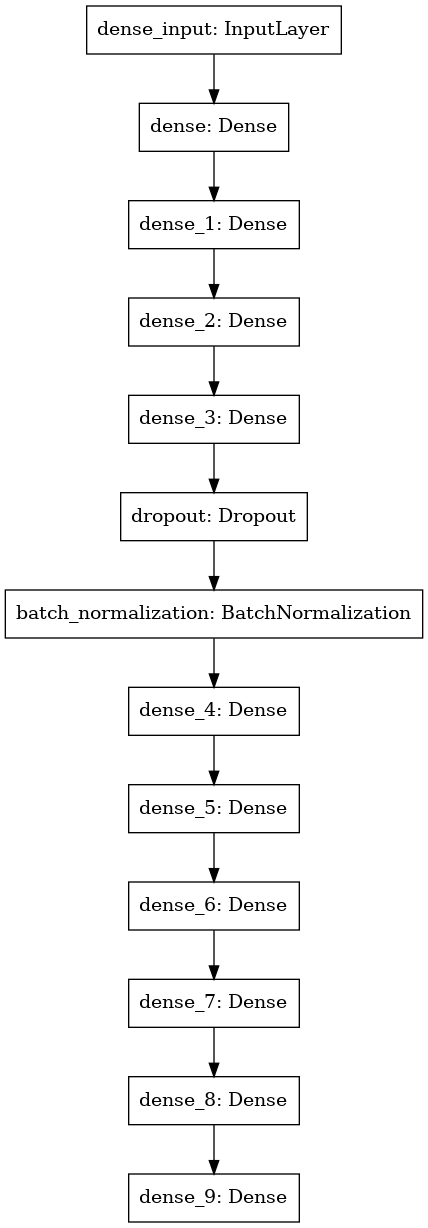

In [27]:
tf.keras.utils.plot_model(model)

In [28]:
# Callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    patience=3,
    #min_delta=0.001,
    monitor='val_loss', 
    mode='min', 
    verbose=1,
    #restore_best_weights=True,
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.75,
    patience=1, #min_lr=1357e-6
)

# Training
history = model.fit(X, y, 
                    epochs=5, 
                    validation_split=0.02, 
                    #batch_size=256,
                    callbacks=[early_stopping, reduce_lr],
                    #verbose=1
                   )

2022-07-24 15:35:28.470645: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5
85/85 [==============================] - 4s 25ms/step - loss: 280.4238 - mae: 16.4912 - val_loss: 387.9199 - val_mae: 19.6467
Epoch 2/5
85/85 [==============================] - 2s 21ms/step - loss: 231.7145 - mae: 14.9590 - val_loss: 349.6230 - val_mae: 18.6466
Epoch 3/5
85/85 [==============================] - 2s 22ms/step - loss: 206.9238 - mae: 14.1071 - val_loss: 320.3330 - val_mae: 17.8439
Epoch 4/5
85/85 [==============================] - 2s 21ms/step - loss: 187.7820 - mae: 13.3908 - val_loss: 294.3041 - val_mae: 17.0989
Epoch 5/5
85/85 [==============================] - 2s 22ms/step - loss: 167.1145 - mae: 12.6155 - val_loss: 270.4016 - val_mae: 16.3849


Minimum Validation Loss: 270.4016


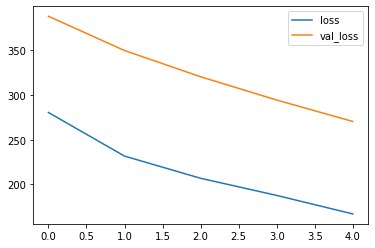

In [29]:
history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print(("Minimum Validation Loss: {:0.4f}").format(history_df['val_loss'].min()))

- Evaluation

In [30]:
import math
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Define Evaluate Function
def evaluates_model(y_test, y_pred):
    print("*"*12, "Evaluations", "*"*12, '\n')
    
    print("MAE model :", mean_absolute_error(y_test, y_pred))
    
    print("MSE model :", mean_squared_error(y_test, y_pred))
    
    #print("R2_Score model :", r2_score(y_test, y_pred))
    
    #mse_1 = np.square(np.subtract(y_test,y_pred)).mean() 
    
    #print("RMSE model :", math.sqrt(mse_1))

In [31]:
evaluates_model(y, model.predict(X))

************ Evaluations ************ 

MAE model : 12.315708514332531
MSE model : 159.63362377506698


- Save model

In [32]:
model.save("sht_keras_model.v1")

2022-07-24 15:35:41.902050: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


# Making test prediction

In [33]:
y_pred = model.predict(test_fe)

# Submission

In [34]:
sub = pd.read_csv('../input/smart-homes-temperature-time-series-forecasting/sample_submission.csv')
sub['Indoor_temperature_room'] = y_pred

sub.describe()

,Id,Indoor_temperature_room
count,1373.000000,1373.000000
mean,3450.000000,6.481807
std,396.495271,0.537580
min,2764.000000,-5.694692
25%,3107.000000,6.507623
50%,3450.000000,6.507663
75%,3793.000000,6.507713
max,4136.000000,6.509975


In [35]:
sub.to_csv("submission.csv", index=False)
sub

,Id,Indoor_temperature_room
0,2764,6.507629
1,2765,6.507629
2,2766,6.507629
3,2767,6.507631
4,2768,6.507630
...,...,...
1368,4132,6.509956
1369,4133,6.509915
1370,4134,6.509932
1371,4135,6.509911
